# Multiscale Entropy

This notebooks runs multiscale entropy metrics on time series signals.

This notebook includes:
- multiscale approximate entropy
- multiscale sample entropy
- multiscale permutation entropy
- multiscale weighted permutation entropy

In [1]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_knee, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims_load
from apm.run import run_sims_parallel as run_sims
from apm.methods import multi_sample_entropy, multi_app_entropy, multi_perm_entropy, multi_wperm_entropy
from apm.methods.settings import MAP_ENT_PARAMS, MSA_ENT_PARAMS, MPE_ENT_PARAMS, MWPE_ENT_PARAMS
from apm.plts.sims import plot_sims, plot_ap_sims, plot_pe_sims, plot_sims_two
from apm.plts.settings import EXT, COLORS
from apm.sim.settings import N_SIMS
from apm.sim.examples import get_examples, check_examples
from apm.sim.defs import SIM_ITERS

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Check settings for entropy measures
print('Multiscale Approximate Entropy:\t\t', MAP_ENT_PARAMS)
print('Multiscale Sample Entropy:\t\t', MSA_ENT_PARAMS)
print('Multiscale Permutation Entropy:\t\t', MPE_ENT_PARAMS)
print('Multiscale WPermutation Entropy:\t', MPE_ENT_PARAMS)

Multiscale Approximate Entropy:		 {}
Multiscale Sample Entropy:		 {}
Multiscale Permutation Entropy:		 {}
Multiscale WPermutation Entropy:	 {}


In [5]:
# Set the random seed
set_random_seed(111)

In [6]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '26_multiscale'

In [7]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

In [8]:
# Define collection of example signals
examples = get_examples()

## Calculating Multiscale Entropy Measures on Example Signals

In [9]:
# Check the calculated multsicale approximate entropy across some example signals
check_examples(examples, multi_app_entropy, MAP_ENT_PARAMS, 'multiscale approximate entropy')

Computed multiscale approximate entropy:
  powerlaw       : 	 0.2663
  synaptic       : 	 0.3916
  knee           : 	 0.4544
  oscillation    : 	 0.0051
  burst          : 	 0.0458
  combined       : 	 0.2345
  comb_burst     : 	 0.2428
  comb_peak      : 	 0.2346


In [10]:
# Check the calculated multsicale sample entropy across some example signals
check_examples(examples, multi_sample_entropy, MSA_ENT_PARAMS, 'multiscale sample entropy')

Computed multiscale sample entropy:
  powerlaw       : 	 0.4376
  synaptic       : 	 0.5150
  knee           : 	 0.6933
  oscillation    : 	 0.0055
  burst          : 	 0.0368
  combined       : 	 0.3288
  comb_burst     : 	 0.3784
  comb_peak      : 	 0.3194


In [11]:
# Check the calculated multsicale permutation entropy across some example signals
check_examples(examples, multi_perm_entropy, MPE_ENT_PARAMS, 'multiscale permutation entropy')

Computed multiscale permutation entropy:
  powerlaw       : 	 0.9440
  synaptic       : 	 0.9561
  knee           : 	 0.9540
  oscillation    : 	 0.7999
  burst          : 	 0.8933
  combined       : 	 0.9451
  comb_burst     : 	 0.9449
  comb_peak      : 	 0.9464


In [12]:
# Check the calculated multsicale weighted permutation entropy across some example signals
check_examples(examples, multi_wperm_entropy, MWPE_ENT_PARAMS, 'multiscale weighted permutation entropy')

Computed multiscale weighted permutation entropy:
  powerlaw       : 	 0.9041
  synaptic       : 	 0.9315
  knee           : 	 0.9150


/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurokit2/complexity/entropy_permutation.py:180: RuntimeWarning: invalid value encountered in divide
  freq = freq / info["Weights"].sum()


  oscillation    : 	 0.7145
  burst          : 	 0.8581
  combined       : 	 0.9062
  comb_burst     : 	 0.9080
  comb_peak      : 	 0.9153


## Multiscale Approximate Entropy


#### Aperiodic Variations

In [13]:
# Run simulations calculating multiscale approximate entropy across exponents
m_ap_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], multi_app_entropy, MAP_ENT_PARAMS, N_SIMS)

In [14]:
# Run simulations calculating multiscale approximate entropy across exponents, with an oscillation
m_ap_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], multi_app_entropy, MAP_ENT_PARAMS, N_SIMS)

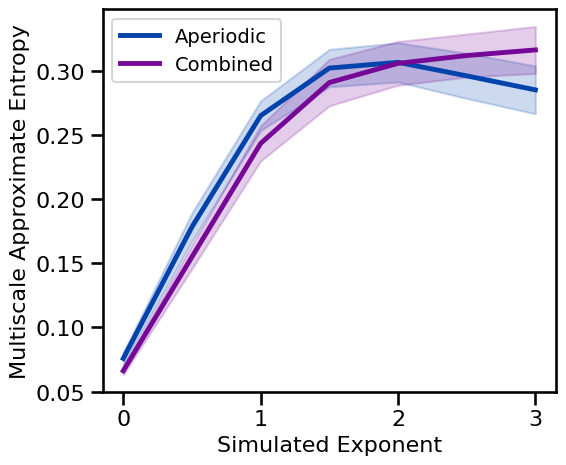

In [15]:
# Plot multiscale approximate entropy measures across aperiodic variations
plot_ap_sims(m_ap_sims_exp, m_ap_sims_comb, 'Multiscale Approximate Entropy', 
             save_fig=SAVE_FIG, file_name='m_ap_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [16]:
# Run simulations calculating multiscale approximate entropy across oscillation frequency
m_ap_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], multi_app_entropy, MAP_ENT_PARAMS, N_SIMS)

In [17]:
# Run simulations calculating multiscale approximate entropy across oscillation power
m_ap_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], multi_app_entropy, MAP_ENT_PARAMS, N_SIMS)

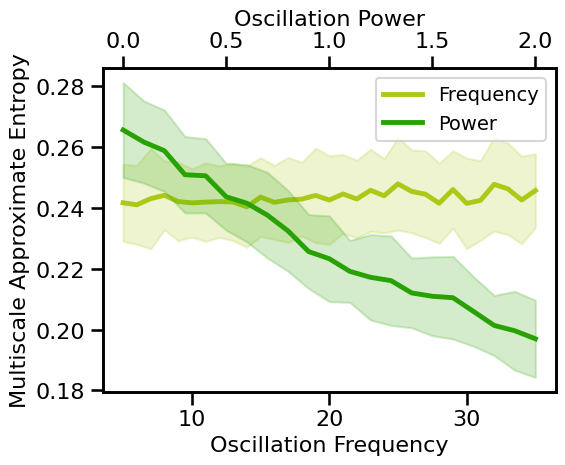

In [18]:
# Plot multiscale approximate entropy measures across aperiodic variations
plot_pe_sims(m_ap_sims_freq, m_ap_sims_pow, 'Multiscale Approximate Entropy', 
             save_fig=SAVE_FIG, file_name='m_ap_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [19]:
# Run simulations calculating multiscale approximate entropy across timescales
m_ap_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'], multi_app_entropy, MAP_ENT_PARAMS, N_SIMS)

In [20]:
# Run simulations calculating multiscale approximate entropy across different knee parameters (sims from file)
m_ap_sims_knee = run_sims_load(SIMPATH / 'ts_sims_ap_knee', multi_app_entropy, MAP_ENT_PARAMS)

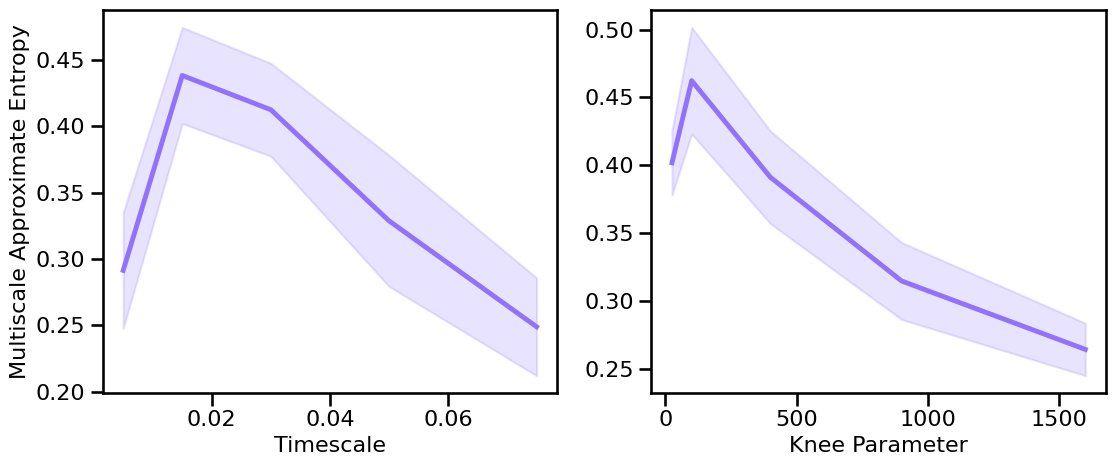

In [21]:
# Plot the estimated multiscale approximate entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, m_ap_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, m_ap_sims_knee, 'Knee Parameter',
              ylabel='Multiscale Approximate Entropy', color=COLORS['KN'], 
              save_fig=SAVE_FIG, file_name='m_ap_kn_vars' + EXT, file_path=FIGPATH)

#### Peak Variations

In [22]:
# Run simulations calculating multiscale approximate entropy across peak bandwidths (sims from file)
m_ap_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', multi_app_entropy, MAP_ENT_PARAMS)

In [23]:
# Run simulations calculating multiscale approximate entropy across burst probabilities
m_ap_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], multi_app_entropy, MAP_ENT_PARAMS, N_SIMS)

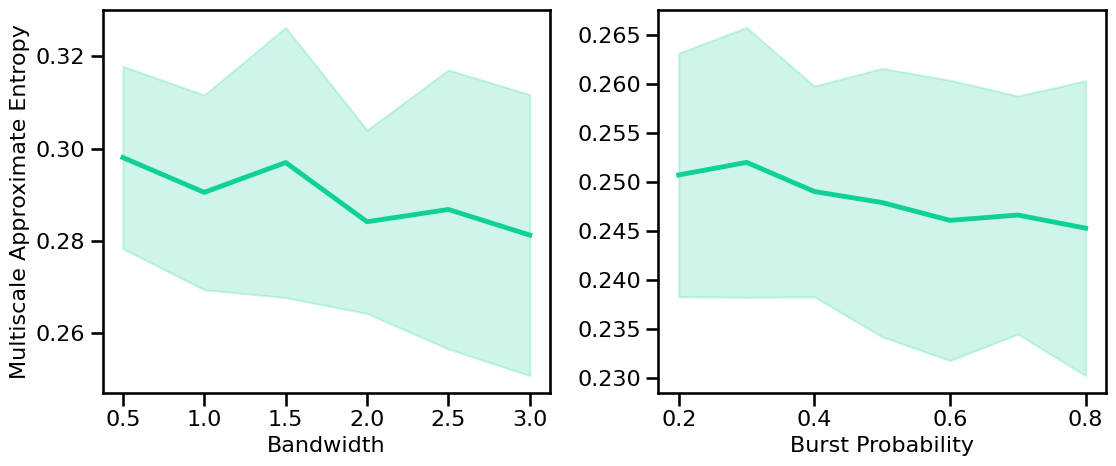

In [24]:
# Plot the estimated multiscale approximate entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, m_ap_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, m_ap_sims_burst, 'Burst Probability',
              ylabel='Multiscale Approximate Entropy', color=COLORS['BW'],
              save_fig=SAVE_FIG, file_name='m_ap_pe_vars' + EXT, file_path=FIGPATH)

## Multiscale Sample Entropy

#### Aperiodic Variations

In [25]:
# Run simulations calculating multiscale sample entropy across exponents
m_sa_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], multi_sample_entropy, MSA_ENT_PARAMS, N_SIMS)

In [26]:
# Run simulations calculating multiscale sample entropy across exponents, with an oscillation
m_sa_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], multi_sample_entropy, MSA_ENT_PARAMS, N_SIMS)

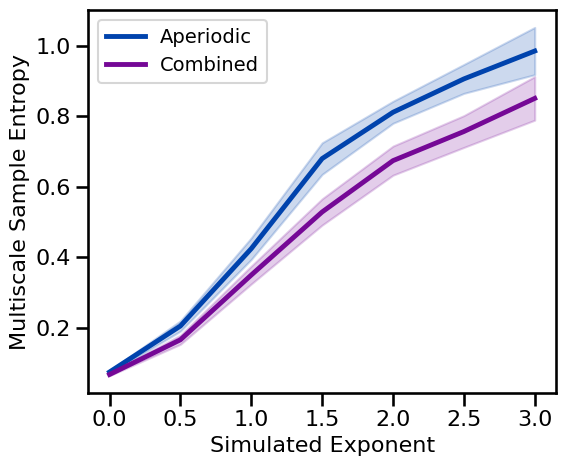

In [27]:
# Plot multiscale sample entropy measures across aperiodic variations
plot_ap_sims(m_sa_sims_exp, m_sa_sims_comb, 'Multiscale Sample Entropy', 
             save_fig=SAVE_FIG, file_name='m_sa_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [28]:
# Run simulations calculating multiscale sample entropy across oscillation frequency
m_sa_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], multi_sample_entropy, MSA_ENT_PARAMS, N_SIMS)

In [29]:
# Run simulations calculating multiscale sample entropy across oscillation power
m_sa_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], multi_sample_entropy, MSA_ENT_PARAMS, N_SIMS)

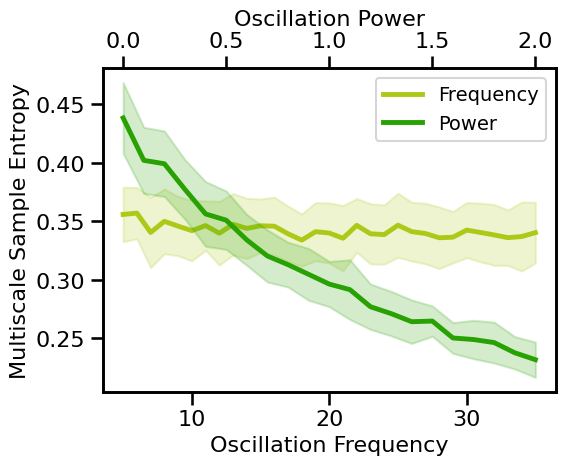

In [30]:
# Plot multiscale approximate sample measures across aperiodic variations
plot_pe_sims(m_sa_sims_freq, m_sa_sims_pow, 'Multiscale Sample Entropy', 
             save_fig=SAVE_FIG, file_name='m_sa_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [31]:
# Run simulations calculating multiscale sample entropy across timescales
m_sa_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'], multi_sample_entropy, MSA_ENT_PARAMS, N_SIMS)

In [32]:
# Run simulations calculating multiscale sample entropy across different knee parameters (sims from file)
m_sa_sims_knee = run_sims_load(SIMPATH / 'ts_sims_ap_knee', multi_app_entropy, MSA_ENT_PARAMS)

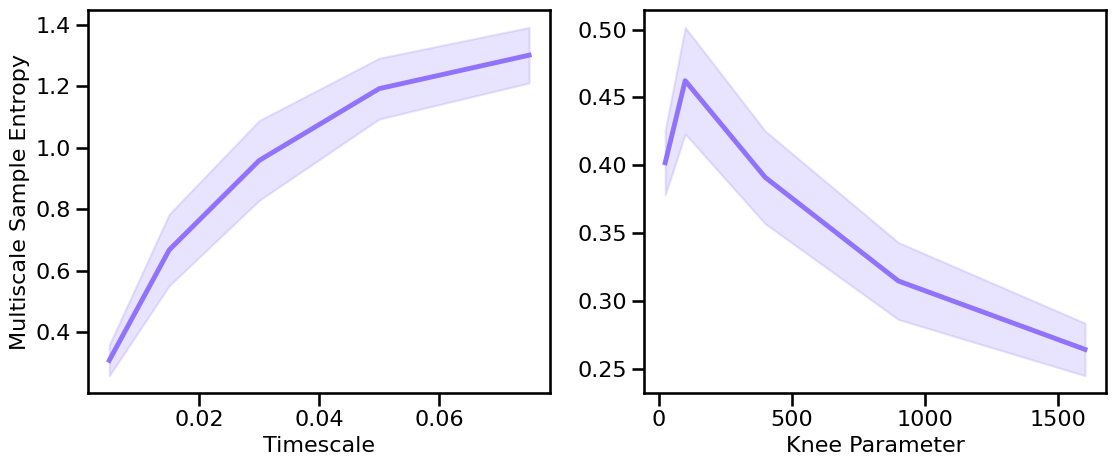

In [33]:
# Plot the estimated multiscale sample entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, m_sa_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, m_sa_sims_knee, 'Knee Parameter',
              ylabel='Multiscale Sample Entropy', color=COLORS['KN'], 
              save_fig=SAVE_FIG, file_name='m_sa_kn_vars' + EXT, file_path=FIGPATH)

#### Peak Variations

In [34]:
# Run simulations calculating multiscale sample entropy across peak bandwidths (sims from file)
m_sa_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', multi_sample_entropy, MSA_ENT_PARAMS)

In [35]:
# Run simulations calculating multiscale sample entropy across burst probabilities
m_sa_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], multi_sample_entropy, MSA_ENT_PARAMS, N_SIMS)

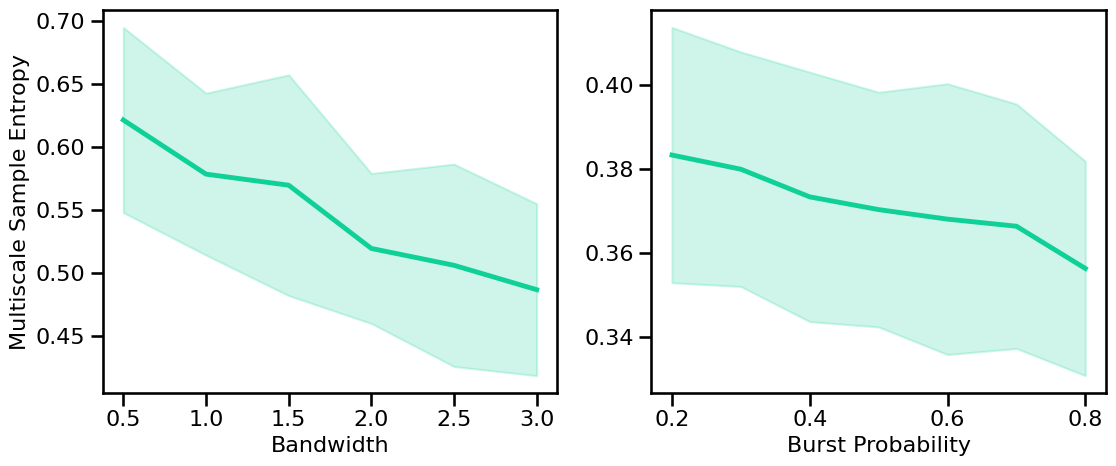

In [36]:
# Plot the estimated multiscale approximate entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, m_sa_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, m_sa_sims_burst, 'Burst Probability',
              ylabel='Multiscale Sample Entropy', color=COLORS['BW'],
              save_fig=SAVE_FIG, file_name='m_sa_pe_vars' + EXT, file_path=FIGPATH)

## Multiscale Permutation Entropy

#### Aperiodic Variations

In [37]:
# Run simulations calculating multiscale permutation entropy across exponents
m_pe_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], multi_perm_entropy, MPE_ENT_PARAMS, N_SIMS)

In [38]:
# Run simulations calculating multiscale permutation entropy across exponents, with an oscillation
m_pe_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], multi_perm_entropy, MPE_ENT_PARAMS, N_SIMS)

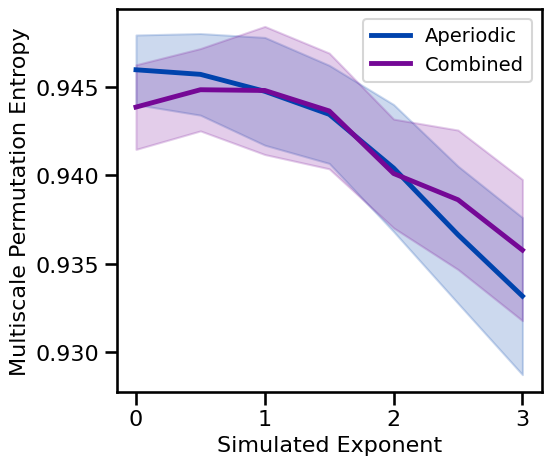

In [39]:
# Plot multiscale permutation entropy measures across aperiodic variations
plot_ap_sims(m_pe_sims_exp, m_pe_sims_comb, 'Multiscale Permutation Entropy', 
             save_fig=SAVE_FIG, file_name='m_pe_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [40]:
# Run simulations calculating multiscale permutation entropy across oscillation frequency
m_pe_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], multi_perm_entropy, MPE_ENT_PARAMS, N_SIMS)

In [41]:
# Run simulations calculating multiscale permutation entropy across oscillation power
m_pe_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], multi_perm_entropy, MPE_ENT_PARAMS, N_SIMS)

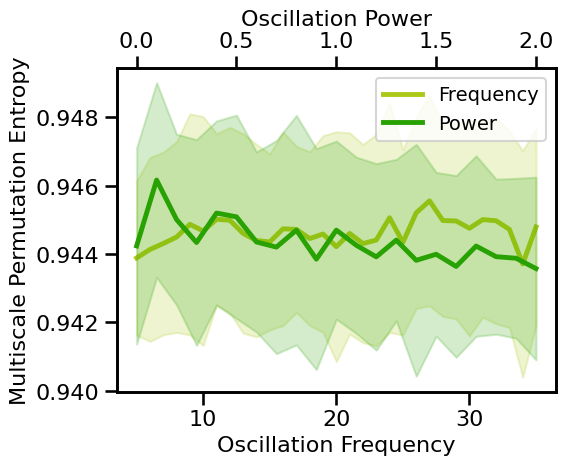

In [42]:
# Plot multiscale permutation entropy measures across aperiodic variations
plot_pe_sims(m_pe_sims_freq, m_pe_sims_pow, 'Multiscale Permutation Entropy', 
             save_fig=SAVE_FIG, file_name='m_pe_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [43]:
# Run simulations calculating multiscale permutation entropy across timescales
m_pe_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'], multi_perm_entropy, MPE_ENT_PARAMS, N_SIMS)

In [44]:
# Run simulations calculating multiscale permutation entropy across different knee parameters (sims from file)
m_pe_sims_knee = run_sims_load(SIMPATH / 'ts_sims_ap_knee', multi_perm_entropy, MPE_ENT_PARAMS)

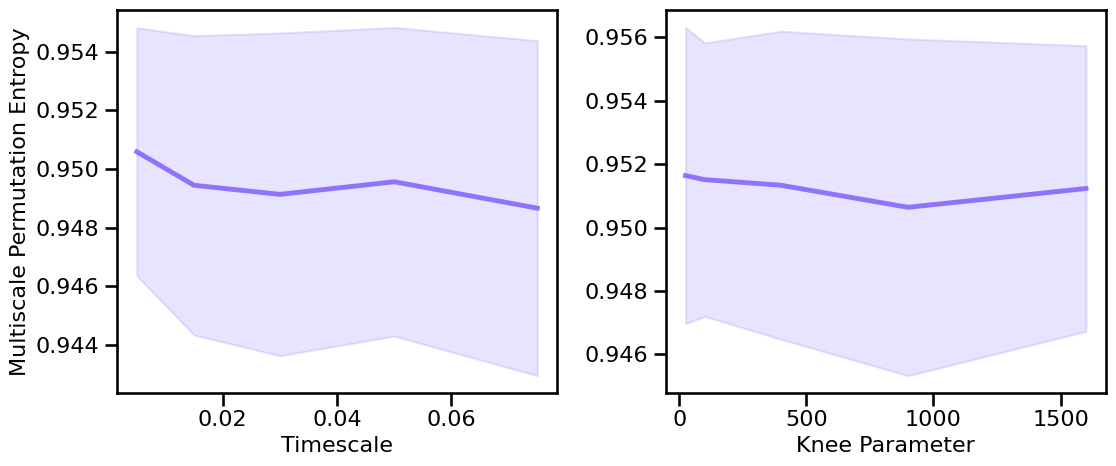

In [45]:
# Plot the estimated multiscale permutation entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, m_pe_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, m_pe_sims_knee, 'Knee Parameter',
              ylabel='Multiscale Permutation Entropy', color=COLORS['KN'], 
              save_fig=SAVE_FIG, file_name='m_pe_kn_vars' + EXT, file_path=FIGPATH)

#### Peak Variations

In [46]:
# Run simulations calculating multiscale permutation entropy across peak bandwidths (sims from file)
m_pe_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', multi_perm_entropy, MPE_ENT_PARAMS)

In [47]:
# Run simulations calculating multiscale permutation entropy across burst probabilities
m_pe_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], multi_perm_entropy, MPE_ENT_PARAMS, N_SIMS)

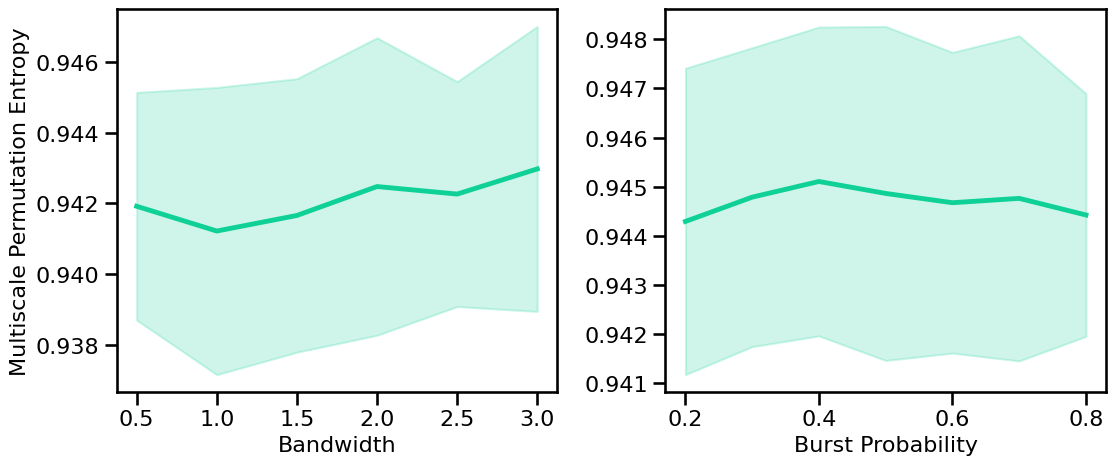

In [48]:
# Plot the estimated multiscale permutation entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, m_pe_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, m_pe_sims_burst, 'Burst Probability',
              ylabel='Multiscale Permutation Entropy', color=COLORS['BW'],
              save_fig=SAVE_FIG, file_name='m_pe_pe_vars' + EXT, file_path=FIGPATH)

## Multiscale Weighted Permutation Entropy

#### Aperiodic Variations

In [49]:
# Run simulations calculating multiscale weighted permutation entropy across exponents
m_wpe_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], multi_wperm_entropy, MWPE_ENT_PARAMS, N_SIMS)

In [50]:
# Run simulations calculating multiscale weighted permutation entropy across exponents, with an oscillation
m_wpe_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], multi_wperm_entropy, MWPE_ENT_PARAMS, N_SIMS)

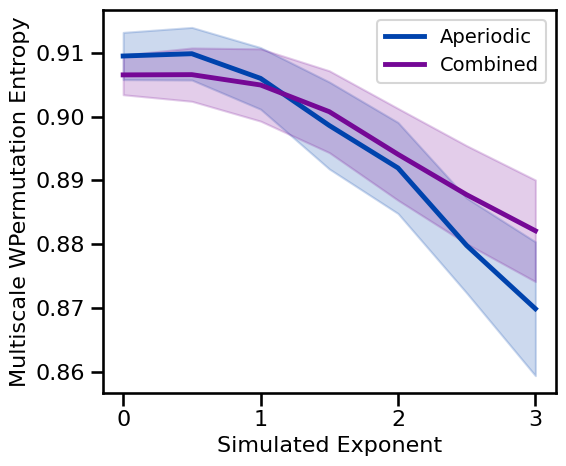

In [51]:
# Plot multiscale weighted permutation entropy measures across aperiodic variations
plot_ap_sims(m_wpe_sims_exp, m_wpe_sims_comb, 'Multiscale WPermutation Entropy', 
             save_fig=SAVE_FIG, file_name='m_wpe_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [52]:
# Run simulations calculating multiscale weighted permutation entropy across oscillation frequency
m_wpe_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], multi_wperm_entropy, MAP_ENT_PARAMS, N_SIMS)

In [53]:
# Run simulations calculating multiscale weighted permutation entropy across oscillation power
m_wpe_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], multi_wperm_entropy, MAP_ENT_PARAMS, N_SIMS)

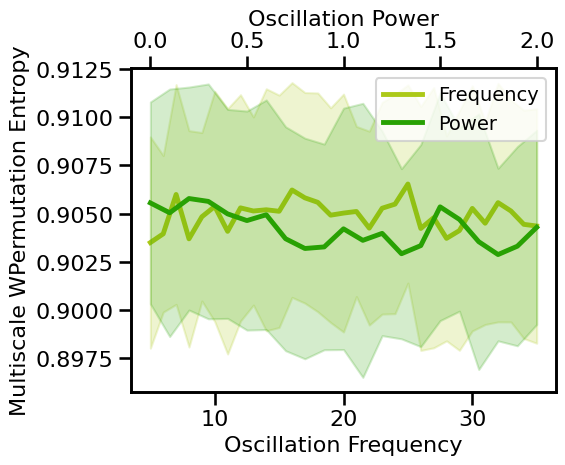

In [54]:
# Plot multiscale weighted permutation entropy measures across aperiodic variations
plot_pe_sims(m_wpe_sims_freq, m_wpe_sims_pow, 'Multiscale WPermutation Entropy', 
             save_fig=SAVE_FIG, file_name='m_wpe_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [55]:
# Run simulations calculating multiscale weighted permutation entropy across timescales
m_wpe_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'], multi_wperm_entropy, MWPE_ENT_PARAMS, N_SIMS)

In [56]:
# Run simulations calculating multiscale weighted permutation entropy across different knee parameters (sims from file)
m_wpe_sims_knee = run_sims_load(SIMPATH / 'ts_sims_ap_knee', multi_wperm_entropy, MWPE_ENT_PARAMS)

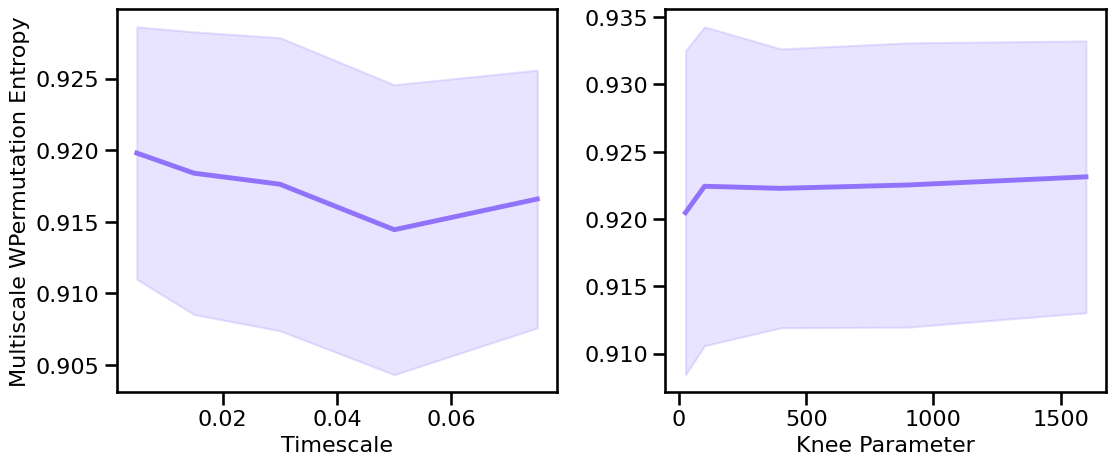

In [57]:
# Plot the estimated multiscale weighted permutation entropy across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, m_wpe_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, m_wpe_sims_knee, 'Knee Parameter',
              ylabel='Multiscale WPermutation Entropy', color=COLORS['KN'], 
              save_fig=SAVE_FIG, file_name='m_wpe_kn_vars' + EXT, file_path=FIGPATH)

#### Peak Variations

In [58]:
# Run simulations calculating multiscale weighted permutation entropy across peak bandwidths (sims from file)
m_wpe_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', multi_wperm_entropy, MWPE_ENT_PARAMS)

In [59]:
# Run simulations calculating multiscale weighted permutation entropy across burst probabilities
m_wpe_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], multi_wperm_entropy, MWPE_ENT_PARAMS, N_SIMS)

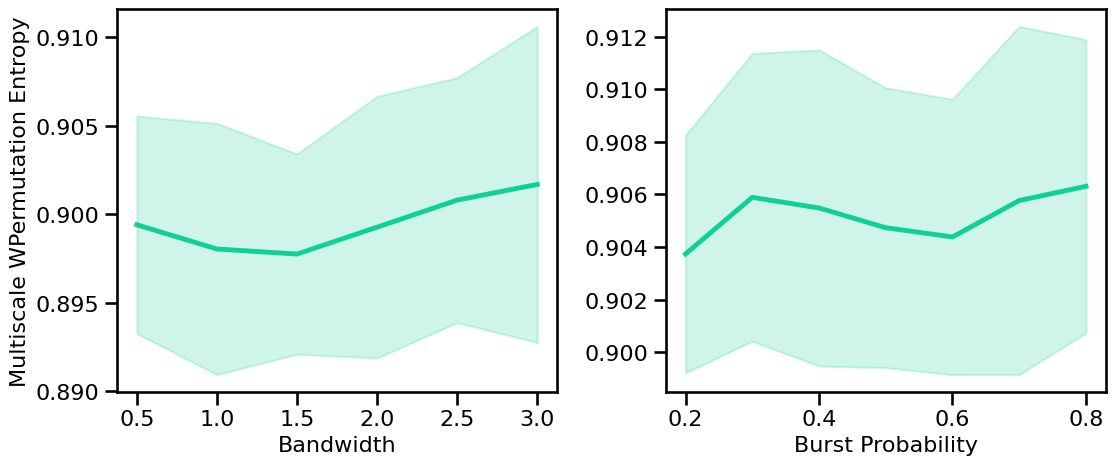

In [60]:
# Plot the estimated multiscale permutation entropy across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, m_wpe_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, m_wpe_sims_burst, 'Burst Probability',
              ylabel='Multiscale WPermutation Entropy', color=COLORS['BW'],
              save_fig=SAVE_FIG, file_name='m_wpe_pe_vars' + EXT, file_path=FIGPATH)

## Conclusions

From these simulations we can see that:
- for multiscale approximate and sample entropy, measures tend to increase with increasing aperiodic exponent
- for multiscale permutation and weighted permutation entropy, measures tend to decrease with increasing aperiodic exponent
- estimates of multiscale entropy tend to be quite stable across variations of oscillation frequency and power